In [31]:
import csv
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [32]:
data = pd.read_csv('marathon_results_2015.csv')
#data.head()

In [34]:
age_notblank = data['Age'].notnull()
notblank = data["M/F"].notnull()
male = (data["M/F"] == "M")
filter_male = data[male & notblank & age_notblank] #data for male
female = (data["M/F"] == "F")
filter_female = data[female & notblank & age_notblank] #data for female

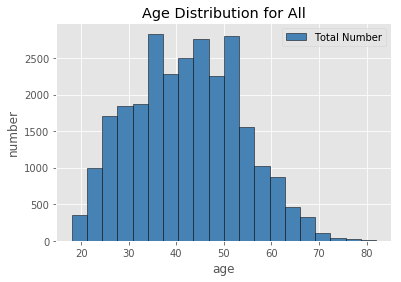

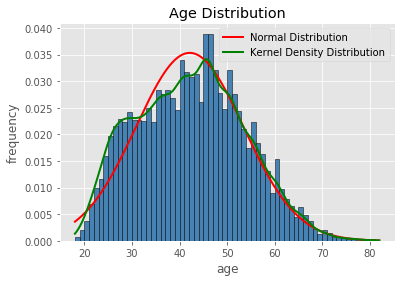

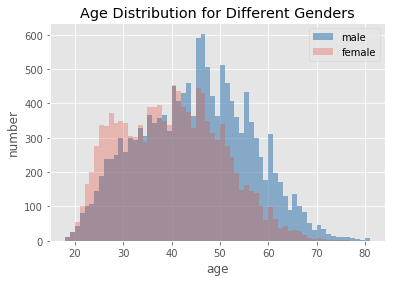

In [35]:
data.dropna(subset=['M/F'], inplace=True)
data.dropna(subset=['Age'], inplace=True)
plt.style.use('ggplot')
plt.hist(data.Age,
        bins = 20,
        color = 'steelblue',
        edgecolor = 'k',
        label = 'Total Number')
plt.title('Age Distribution for All')
plt.xlabel('age')
plt.ylabel('number')
plt.tick_params(top='off', right='off')
plt.legend()
plt.show()

plt.hist(data.Age,
        bins = np.arange(data.Age.min(),data.Age.max(),1),
        normed = True,
        color = 'steelblue',
        edgecolor = 'k')
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('frequency')
x1 = np.linspace(data.Age.min(), data.Age.max(), 1000)
normal = mlab.normpdf(x1, data.Age.mean(), data.Age.std())
line1, = plt.plot(x1,normal,'r-', linewidth = 2) 
kde = mlab.GaussianKDE(data.Age)
x2 = np.linspace(data.Age.min(), data.Age.max(), 1000)
line2, = plt.plot(x2,kde(x2),'g-', linewidth = 2)
plt.tick_params(top='off', right='off')
plt.legend([line1, line2],['Normal Distribution','Kernel Density Distribution'],loc='best')
plt.show()

age_female = filter_female.Age[data['M/F'] == 'F']
age_male = filter_male.Age[data['M/F'] == 'M']
bins = np.arange(data.Age.min(), data.Age.max(), 1)
plt.hist(age_male, bins = bins, label = 'male', color = 'steelblue', alpha = 0.6)
plt.hist(age_female, bins = bins, label = 'female', alpha = 0.3)
plt.title('Age Distribution for Different Genders')
plt.xlabel('age')
plt.ylabel('number')
plt.tick_params(top='off', right='off')
plt.legend()
plt.show()